<a href="https://colab.research.google.com/github/AnasAkenoun/Nucleation-growth-process/blob/main/Lab_nucleation%26growth_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **## Report_labwork_nucleation and growth process**

The code simulates the nucleation and growth process of a crystal on a 2D grid.
- The grid represents the lattice structure of the material.
- The grow_crystal function is responsible for simulating the nucleation and growth process. It iterates over the grid, checking each cell to determine whether it is a nucleation site or an existing crystal. Based on certain conditions, it assigns neighboring cells as new nucleation sites or adds to the existing crystal.



```
I will go through the code step by step and comment on each operation and
iteration in the nucleation and growth process:
First:
1. Imporation of the necessary librairies  
Then
2. Set the size of the grid and the nucleation rate:

```










In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.optimize import curve_fit

N=100
grid = np.zeros((N, N))
nucleation_rate=0.01




Pnuc = 0
Pgrow = 1


def grow_crystal(time):
    global X_t
    nucleation_sites=random.random()
    if time == 0:
        return grid

    else:
        new_grid = np.copy(grid)
        for n in range(time):
            for i in range(N):
                for j in range(N):
                    if grid[i, j] == 1:    ## Check wether it's a nuclei or not !
                        if i > 0:
                            if nucleation_sites< Pgrow:
                                new_grid[i-1, j] = 1
                        if j > 0:
                            if nucleation_sites< Pgrow:
                                new_grid[i, j-1] = 1
                        if i < N - 1:
                            if nucleation_sites< Pgrow:
                                new_grid[i+1, j] = 1
                        if j < N - 1:
                            if nucleation_sites< Pgrow:
                                new_grid[i, j+1] = 1
                    else:
                        if nucleation_sites< Pnuc:
                            new_grid[i, j] = 1

        grid[:] = new_grid[:]
        P=np.sum(grid)/N**2
        X_t.append(P)
        return X_t









- The variables Pnuc and Pgrow represent the probabilities of nucleation and growth, respectively. These probabilities determine the likelihood of nucleation or growth happening based on randomly generated values.

In [ ]:
# TODO: Write JMAK equation
#k - const
#t - time
#n - A previous study found that the value of n in the JMAK equation corresponds to the growth direction of the recrystallized grains

def avrami(time, k, n):
    X_t_av=1-np.exp(-k*time**n)
    return X_t_av

The **avrami function **represents the Avrami equation, which is a mathematical model used to describe the kinetics of phase transformations. The equation relates the fraction transformed at a given time to the rate of transformation and the growth rate exponent.

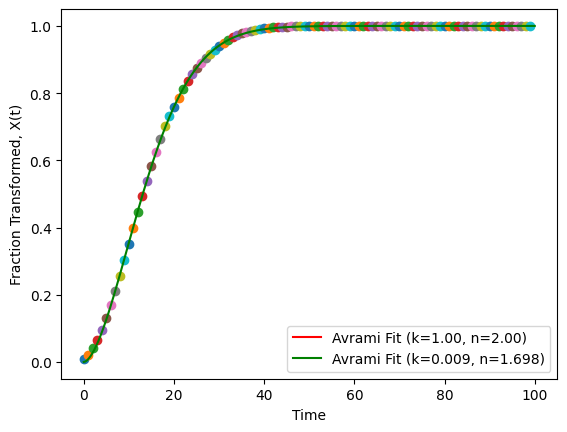

In [ ]:
X_t = []
grid = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if random.random()< 0.001:
            grid[i, j] = 1
time=100

for i in range(time):
    grow_crystal(1)
    plt.scatter(i, X_t[-1])

time_data = np.array(range(time))
X_t_data = np.array(X_t)
params, covariance = curve_fit(avrami, time_data, X_t_data, bounds=([0, 1.], [1.,4.]))
k_opt, n_opt = params

time_fit = np.linspace(0, time, 100000)
X_t_fit = avrami(time_fit, k_opt, n_opt)
params = [1.0, 2.0]  # Example parameters ()
plt.plot(time, avrami(time, *params), label=f'Avrami Fit (k={params[0]:.2f}, n={params[1]:.2f})',color = 'r')
plt.plot(time_fit, X_t_fit, label=f'Avrami Fit (k={k_opt:.3f}, n={n_opt:.3f})', color='g')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Fraction Transformed, X(t)')

plt.show()

- The code also performs curve fitting using the curve_fit function from the scipy.optimize module to determine the optimal values of the constants k and n in the Avrami equation that best fit the experimental data.
- The code then plots the fraction transformed over time and displays the fitted curve using the optimal values of k and n.

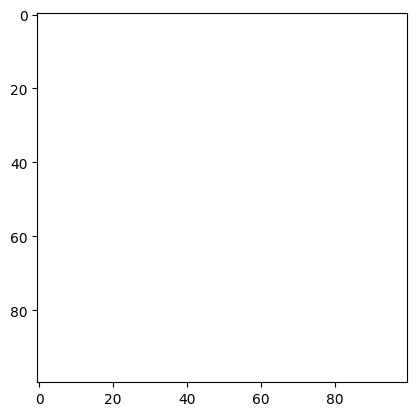

In [ ]:
grid = np.zeros((N, N))
grow_crystal(1)

nucleation_rate=0.01

for i in range(N):
  for j in range(N):
    nucleation_sites=random.random()
    if  nucleation_sites< nucleation_rate:
            grid[i, j] = 1

# Initialize animation
fig, ax = plt.subplots()
im = ax.imshow(grid, cmap='gray')

def update(frame):
    grow_crystal(1)
    im.set_array(grid)
    return [im]

anim = FuncAnimation(fig, update, frames=50, blit=True)

HTML(anim.to_jshtml())
#plt.close(fig)

- Additionally, the code includes an animation of the crystal growth process using the FuncAnimation class from the matplotlib.animation module. The update function is called at each frame to update the grid and display the updated state of the crystal growth.

The n factor, also known as the Avrami exponent, plays a crucial role in nucleation and growth transformations. In general, the n factor represents the kinetics of the transformation process and determines the mechanism of nucleation and growth.

In simple cases of nucleation or growth transformation, the n factor is often an integer. This implies that the transformation follows a well-defined mechanism and proceeds in a certain way.

However, in more complex cases, such as nucleation and growth simulations, the n factor is not necessarily restricted to being an integer. It can take on a range of values between 1 and 4, including fractional values. These non-integer values indicate that the transformation mechanism is more intricate and may involve multiple processes or stages.



# So, in summary, while the n factor is commonly an integer in simple nucleation or growth transformations, it can take non-integer values between 1 and 4 in more complex simulations or scenarios.